# Generate Inventory
### This notebook is used to showcase how the synthetic events dataset is generated

In [1]:
from random_address import real_random_address
from datetime       import datetime
from pprint         import pprint

import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

import random
import time
import os

default_path = os.getcwd()

In [2]:
# Run this cell in order to return to the defaulted working path
#os.chdir(path = default_path)

## Path Handling for files and Directories

In [70]:
# Get the default or root folder of the user's system in case that any other person needs to run this setup
while not os.getcwd().endswith('Web Scraper'):
    os.chdir('..')
    if os.getcwd().endswith('Users'):
        print("Unable to find the root directory")
        break
users_default_path = os.getcwd()
users_default_path

'/Users/avaldivia/Documents/GitHub/Event-Aggregator/Web Scraper'

In [4]:
# Grab all the directories
data_path   = os.path.join(users_default_path,'Data')

# Grab all the files
steam_games_path = os.path.join(data_path,'steam_games.csv.gzip')
video_games_path = os.path.join(data_path,'games.csv.gzip')
nyc_events_path  = os.path.join(data_path,'nyc_events.csv.gzip')

## Obtaining Distribution of Total Positive reviews

In [ ]:
steam_games = pd.read_csv(steam_games_path, compression='gzip')
print(steam_games.shape)
steam_games.head(n =1)

In [68]:
n_pos_reviews, pos_rev_weights = zip(*tuple(steam_games['total_positive'][steam_games['total_positive'] < (1 * 100)].value_counts().items()))
random.choices(population=n_pos_reviews, weights= pos_rev_weights)

[0]

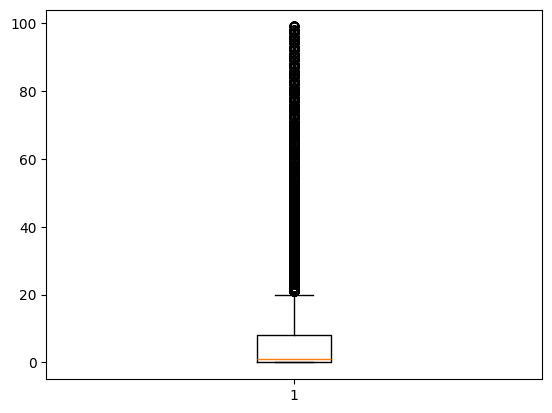

In [69]:
plt.boxplot( steam_games['total_positive'][steam_games['total_positive'] < (1 * 100)])
plt.show()

## Obtaining Price distribution of Steam Games

In [37]:
prices, price_weights = zip(*tuple(steam_games['price_initial (USD)'][steam_games['price_initial (USD)'] < 400].value_counts().items()))
random.choices(population=prices, weights = price_weights)

[0.0]

<Axes: ylabel='price_initial (USD)'>

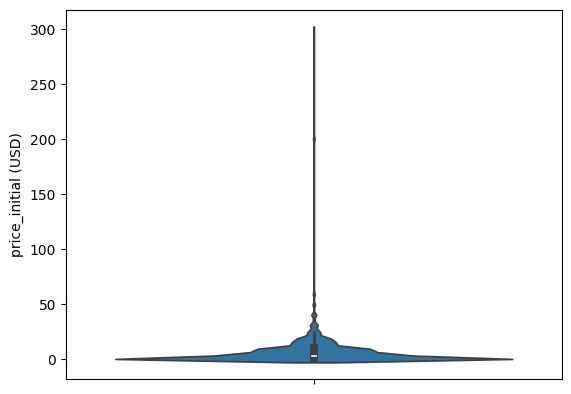

In [73]:
sns.violinplot(data = steam_games['price_initial (USD)'][steam_games['price_initial (USD)'] < 400])

## NYC Events information
- Obtain the different types of events

In [75]:
nyc_events = pd.read_csv(nyc_events_path, compression = 'gzip')
print(nyc_events.shape)
nyc_events.head(n = 1)

(21002, 13)


,Unnamed: 0,Event ID,Event Name,Start Date/Time,End Date/Time,Event Agency,Event Type,Event Borough,Event Location,Event Street Side,Street Closure Type,Community Board,Police Precinct
0,0,449943,Cortelyou Greenmarket Sunday,2019-01-06T08:00:00.000,2019-12-29T17:00:00.000,Street Activity Permit Office,Farmers Market,Brooklyn,CORTELYOU ROAD between RUGBY ROAD and ARGYLE ...,North,Sidewalk and Curb Lane Closure,"14,","70,"


In [104]:
event_types, event_weights  = zip(*tuple(nyc_events['Event Type'].value_counts().items()))
# Remove the most common type of event
event_types   = event_types[1:]
event_weights = event_weights[1:]

random.choices(population=event_types, weights=event_weights)

['Farmers Market']

## Generate a random Address

In [163]:
def generate_address():
    a = real_random_address()
    if 'city' not in a.keys():
        a['city'] = ''
    return (a['address1'],a['address2'],a['city'],a['state'],a['postalCode'],a['coordinates']['lat'],a['coordinates']['lng'])
a1,a2,city, state, zipcode, lat, lng = generate_address()
a1,a2,city, state, zipcode, lat, lng

## Generate a random date and time

In [109]:
def str_time_prop(start, end, time_format, prop):
    stime = time.mktime(time.strptime(start, time_format))
    etime = time.mktime(time.strptime(end, time_format))
    ptime = stime + prop * (etime - stime)
    return time.strftime(time_format, time.localtime(ptime))

def random_date(start, end, prop):
    t = str_time_prop(start, end, '%m/%d/%Y %I:%M %p', prop)
    return datetime.strptime( t, '%m/%d/%Y %I:%M %p')

print( random_date("1/1/2025 1:30 PM", "1/1/2026 4:50 AM", random.random())  )
datetime.now().strftime(format = '%m/%d/%Y %I:%M %p')

2025-09-21 03:54:00


'02/03/2025 04:24 PM'

In [106]:
video_games = pd.read_csv(video_games_path, compression='gzip')
video_games.drop(labels=0,inplace=True)
print(video_games.shape)
print(video_games.columns)
video_games.head(n = 1)

(1511, 14)
Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K


In [148]:
def random_video_game():
    i = (video_games.sample(n = 1, axis=0, ignore_index=True)[['Title','Genres','Summary']].to_dict())
    return (i['Title'][0], i['Genres'][0], i['Summary'][0])
title, genre, summary = random_video_game()
title,genre,summary

('Chibi-Robo!',
 "['Adventure', 'Platform']",
 'Like most families, the Sandersons bicker about money and cleaning. Unlike most families, though, they also have robotic spiders, aliens, and talking toys to worry about. Enter Chibi-Robo, a tiny robot programmed to spread happiness. Join him on his quest to restore order to the Sanderson house and SAVE THE WORLD!')

### Random Functions

In [153]:
n_likes   : int   = lambda: random.choices(population = n_pos_reviews , weights = pos_rev_weights)
event_type: str   = lambda: random.choices(population = event_types   , weights = event_weights  )
price     : float = lambda: random.choices(population = prices        , weights = price_weights  )

rand_date : datetime = lambda: random_date(datetime.now().strftime(format = '%m/%d/%Y %I:%M %p'), "1/1/2026 4:50 AM", random.random())
# a1,a2,city, state, zipcode, lat, lng = generate_address()
# title, genre, summary = random_video_game()

### Generate synthetic dataset

In [167]:
data = {'title'      : [],
        'tags'       : [],
        'description': [],
        'likes'      : [],
        'event type' : [],
        'price'      : [],
        'date'       : [],
        'address1'   : [],
        'address2'   : [],
        'city'       : [],
        'state'      : [],
        'zipcode'    : [],
        'lat'        : [],
        'lng'        : []
        }
for _ in range(200):
    title, genre, summary = random_video_game()
    data['title'].append(title)
    data['tags'].append(genre)
    data['description'].append(summary)

    data['likes'].append(n_likes()[0])
    data['event type'].append(event_type()[0])
    data['price'].append(price()[0])
    data['date'].append(rand_date())

    a1,a2,city, state, zipcode, lat, lng = generate_address()
    data['address1'].append(a1)
    data['address2'].append(a2)
    data['city'].append(city)
    data['state'].append(state)
    data['zipcode'].append(zipcode)
    data['lat'].append(lat)
    data['lng'].append(lng)

df = pd.DataFrame(data = data)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        200 non-null    object        
 1   tags         200 non-null    object        
 2   description  200 non-null    object        
 3   likes        200 non-null    int64         
 4   event type   200 non-null    object        
 5   price        200 non-null    float64       
 6   date         200 non-null    datetime64[ns]
 7   address1     200 non-null    object        
 8   address2     200 non-null    object        
 9   city         200 non-null    object        
 10  state        200 non-null    object        
 11  zipcode      200 non-null    object        
 12  lat          200 non-null    float64       
 13  lng          200 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 22.0+ KB
None


,title,tags,description,likes,event type,price,date,address1,address2,city,state,zipcode,lat,lng
0,Monster Hunter Rise,"['Adventure', 'Brawler', 'RPG']",Rise to the challenge and join the hunt! In Mo...,0,Sport - Adult,24.99,2025-04-21 19:23:00,1217 Bay Street,#318-A,Tybee Island,GA,31328,32.022200,-80.858748
1,Wanted: Dead,"['Adventure', 'Brawler', 'Shooter']","Wanted: Dead promises ""spectacular melee comba...",7,Sport - Adult,4.99,2025-10-06 05:34:00,3194 Bladensburg Road Northeast,,Washington,DC,20018,38.930136,-76.959298
2,Splatoon 3,"['Platform', 'Shooter']","Enter the Splatlands, a sun-scorched desert in...",1,Sport - Adult,1.99,2025-08-07 02:32:00,6231 North 67th Avenue,#241,Glendale,AZ,85301,33.527967,-112.202255
3,The Ultimate Doom,['Shooter'],The complete megahit game that set the world a...,3,Sport - Adult,6.99,2025-09-06 22:47:00,5 Hibiscus Avenue,,Savannah,GA,31404,32.045520,-81.073267
4,Plants vs. Zombies 2: It's About Time,"['Adventure', 'Real Time Strategy', 'Strategy'...","Meet, greet and defeat legions of zombies from...",0,Special Event,0.99,2025-10-27 21:32:00,606 Lincoln Street,,Savannah,GA,31401,32.067905,-81.092159


In [ ]:
#df.to_csv(os.path.join(data_path,'events.csv'))